# Guide : extraction de catalogues d'art numérisés

*Artl@s / IMAGO / Université de Genève / ENS*

**Ce guide explique comment utiliser le programme "extractionCatalogs"**

En partant d'images numérisées de catalogues d'exposition d'art (XIXe et XXe siècle), ce script (programme) nous permet de produire des tableurs (et autres types de fichiers "structurés") organisant toutes leurs informations : exposants, oeuvres, informations complémentaires (adresses, entités spatiales, descriptions, associations académiques, prix, etc.).

Si vous savez déjà utiliser la pipeline, vous pouvez lancer directement le programme extractionCatalogs :

In [ ]:
!python3 run.py chemin_input chemin_output nom_catalogue

## Introduction




**On souhaite passer d'une image de catalogue comme celle-ci :**
<img src="extractionCatalogs/static/images/image_1.jpg" width="300"/>

**À un tableur et un encodage "structurés" :**
<img src="extractionCatalogs/static/images/tableau_1.png"/>


    ADNET (JACQUES)
	né à Chatillon-Coligny (Loiret). Français. — 1 bis, rue HenriRochefort (Aux Armées). S.A. et. S.A.D
		  1. — Un Meuble-Coffre gainé en maroquin. vert, sur un piètement en chêne sahlé 
		      sur un piètement en chêne sahlé (ferrures dorées de G. Poillerat) édité par la Compagnie 
              des Arts 
              Français.
	
    ALBE (MAURICE)
	né à Sarlat (Dordogne). Français. — 1, rue Léon-Dièrx (Aux Armées). S.A.
		  2. — Illustration 
		      (aux armées), p.
      
    ALBIN-GUILLOT (Mme LAURE)
	née à Paris. Française. — 43, boulevard Beausé jour. S.A.D
		  3. — Photographies.

 
\
**C'est à dire que nous voulons, à partir d'un catalogue d'exposition sur un support en papier, extraire des informations, les organiser pour signaler leurs significations, et produire ainsi des objets numériques extrêmement utiles pour la recherche en histoire de l'art.**\
\
Le processus, "semi-automatique", implique des interventions/vérifications/corrections manuelles. Si la prise en main de cette "pipeline" (cheminement par étapes) nécessite d'un apprentissage technique, les résultats acquièrent une performance exponentielle dès lors qu'il s'agit de traiter des corpus conséquants. En effet, saisir à la main des tableurs pour des centaines de catalogues, chacun comportant des dizaines ou des centaines de pages, serait un exercice extrêmement pénible... 
De plus, les technologies numériques utilisées ici sont des outils "open source" fondamentaux dans le domaine des humanités numérique ; ce guide est porté par l'objectif d'en montrer certains usages à des utilisateurs débutants.

Notre "**pipeline semi-automatique**", accompagnée par le présent guide d'utilisation, a donc un intêret **scientifique** (produire des instruments pour la recherche), **technique** (produire efficacement ces instruments) et **pédagogique** (présenter des technologies numériques fondamentales dans le domaine des humanités numériques). Elle comporte deux grandes étapes :

**1. L'utilisation d'eScriptorium, un logiciel de recconnaissance de caractères (OCR) pour transcrire automatiquement des pages (images) numérisées de catalogue**. **eScriptorium** est une interface qui permet de visualiser toute la chaîne de traitement OCR de nos images. Ce traitement est en réalité effectué par **Kraken**, un logicel qui permet d'entraîner et d'appliquer des modèles de reconnaissance de caractères.
- **input** : des **images numériques** de catalogues du XIXe et XXe siècle [.jpg, .png, etc.]
- l'utilisateur/utilisatrice peut ainsi appliquer un modèle efficace pour que la machine face une **transcription automatique des pages**
- l'utilisateur/utilisatrice doit aussi "segmenter" manuellement ces pages, cet à dire nommer ses régions sémantiques (il/elle doit **signaler où se trouvent les entrées de catalogue dans une image**). Dans notre projet, le choix du nom des régions est conforme a une "ontologie" appellée **Segmonto**, qui est tout simplement un standard de nommage des zones dans une page. 
- l'utilisateur/utilisatrice doit faire des **corrections manuelles de la transcription automatique**, sur l'interface même.

- **output** : l'utilisateur/utilisatrice obtiendra en sortie des **fichiers XML "ALTO4"**, un type de document adapté à l'encodage de nos catalogues. Chaque image numérique sera transcrite dans un fichier Alto ; nous obtiendrons donc **un fichier Alto pour chaque page de catalogue**.

**2. L'utilisation d'extractionCatalogs, un progamme qui traite les données produites lors de l'étape antérieure, pour produire les fichiers souhaités (tableurs et autres documents structurés)**
- **input** : des fichiers **XML ALTO4** produits par eScriptorium.
- lancement du script avec la commande suivante : **"!python3 run.py   chemin_input   chemin_output   nom_du_catalogue"**
- le script, écrit dans le langage de programmation **Python 3**, comporte de multiples fonctions qui traitent automatiquement les fichiers en entrée. Pour chaque page de catalogue (c'est à dire pour chaque fichier Alto), il analyse le document ligne par ligne pour reconstituer le catalogue, entrée par entrée. Une entrée est normalement constituée des éléments suivants : nom de l'exposant, informations biographiques/complémentaires, liste des oeuvres présentées. 
- **output** : **fichier XML TEI** ("encodage structuré") : un seul fichier contenant tout le catalogue et signalant sa structure à partir de balises. Ces balises (par exemple \<name>MONET (Claude)<\/name>) signalent les entrées, les exposants, les oeuvres, les informations complémentaires, etc.
- **output** : **tableur CSV** : les mêmes informations sont présentées sous forme de tableau. Celui-ci est beaucoup plus facile à lire par un être humain, et sera utilisé pour **alimenter la base de données Artl@s**, un ambitieux projet en histoire de l'art qui cartographie les expositions du XIXe et XXe siècles. 
- **output** : **fichier .txt indiquant des problèmes** d'extraction, pour que l'utilisateur/utilisatrice puisse faire des **corrections manuelles**.

**Ce guide ne contient pas uniquement des instructions ; il permet de lancer le script d'extraction directement. Il peut donc être utilisé pour effectuer la pipeline, étape par étape**.
  

## Installation

### Utilisation du guide : Jupyter notebook

Ce guide a été créé sur Jupyer Notebook, un logiciel qui permet d'afficher sur un navigateur des fichiers qui présentent des morceaux de code commentés. Sur un notebook Jupyter, il existe deux types de cellule : soit pour afficher et éxécuter du code, soit pour écrire en MarkDown (un langage à balise extrêmement simple). 
Nous pouvons ainsi vous montrer le script en "live", tout en l'accompagnant d'images et de commentaires.

Lorsque vous lancez des cellules de code (tapez SHIFT/ENTER, ou bien COMMAND/ENTER sur mac, ou bien le bouton "Run" sur le menu de la page), vous exécutez directement le script et des commandes sur le terminal ! (si vous voyez un "!" au début de la céllule, cela veut dire qu'on exécute des commandes sur le terminal).

**Pour intégrer une table des matières et rendre les chapitres/sous-chapitres "collapsables", lancez la commande suivante** :

In [ ]:
!jupyter contrib nbextension install --user
!pip install jupyter_nbextensions_configurator
!jupyter nbextensions_configurator enable --user

(rappel : SHIFT/ENTER, ou bien COMMAND/ENTER sur mac, ou bien le bouton "Run" dans le menu de la page)

Vous venez d'installer et d'activer une extension qui vous permet d'activer des add-on pour Jupyter Notebook ! 
Maintenant :
- **1. cliquez sur le logo "Jupyter" en haut à gauche de la page**
- **2. cliquez sur l'onglet "nbextensions"**
- **3. activez les extensions "collapsable Headings" et "Table of contents (2)"**
<img src="extractionCatalogs/static/images/jupyter_extensions_1.png" width="1000"/>


**En cliquant sur ces extensions, vous accédez à leurs menus, dans lesquels vous cocherez les cases suivantes pour activer des options :**

**dans le menu de l'add-on Collapsable Headings :**
- Collapse/uncollapse notebook sections when the ToC2 nbextension is used to collapse/uncollapse sections in the table of contents. For the inverse behaviour, see ToC2's configuration

**dans le menu de l'add-on Table of Content (2) :**
- Skip h1 headings from numbering, so that they can serve as a notebook title. See the README for details, caveats and alternatives
- Collapse/uncollapse ToC sections when the collapsible_headings nbextension is used to collapse/uncollapse sections in the notebook. For the inverse behaviour, see collapsible_headings' configuration

Vous pouvez maintenant **rafraichir la page du guide**, et profiter d'une interface beaucoup plus agréable pour travailler étape par étape. Fermez les onglets, vous obtiendrez ceci :
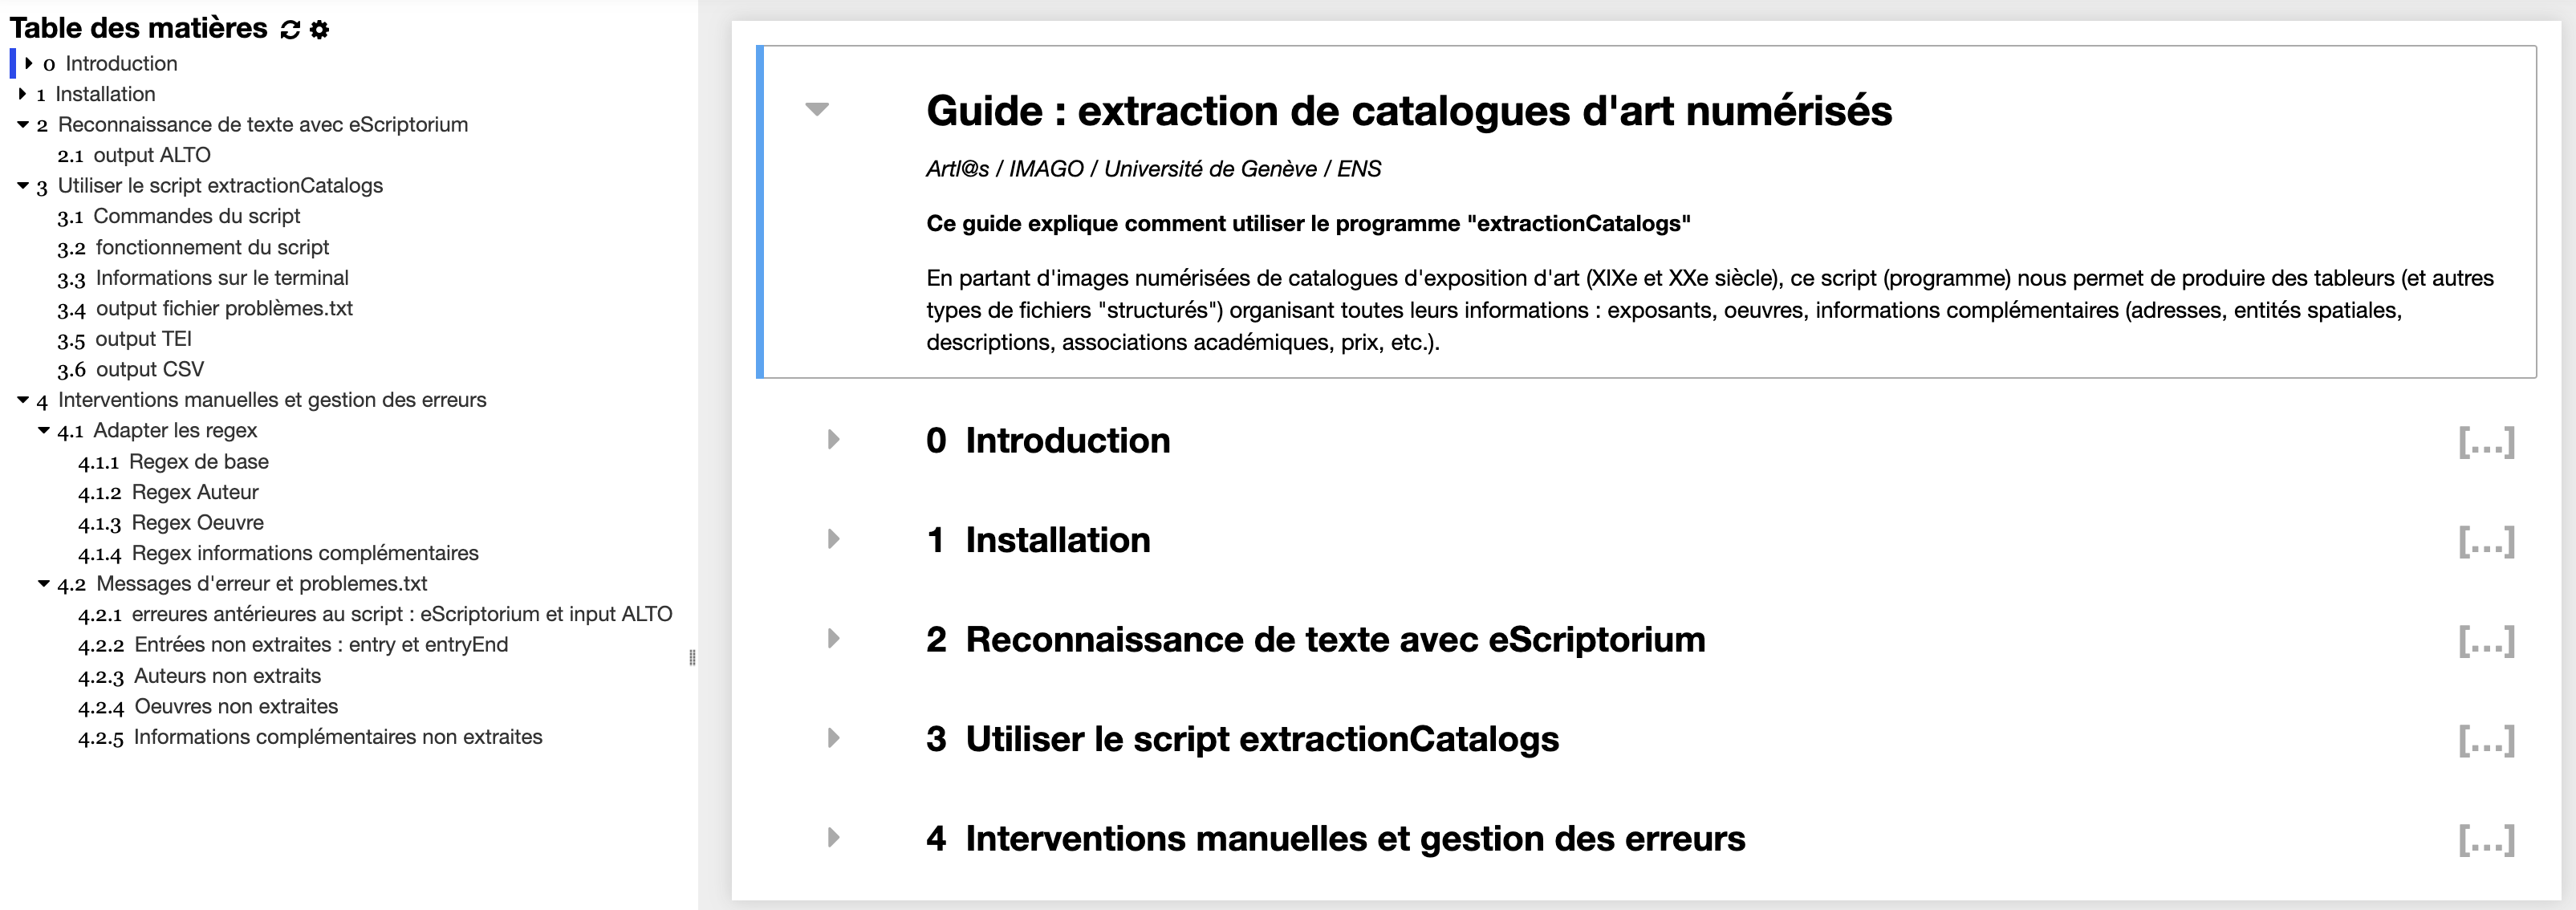

### Colab

Maintenant qu'on a une interface plus adaptée pour le guide, nous allons installer le script extractionCatalogs à proprement parler.\
Pour l'installer depuis Colab, executez la cellule de code suivante :

In [ ]:
!pip install -r requirements.txt

**Cette commande installe les packages python nécessaires pour que le script fonctionne correctement.**
Ces packages sont des sous-ensembles spécialisés du langage de programmation python qui ne sont pas intégrés à la version de base. On en a besoin pour faire tourner ce script, écrit lui aussi en python.

Il suffit de cliquer sur la cellule et d'appuyer sur SHITF/ENTER (COMMAND/ENTER sur Mac), ou bien le bouton "Run" sur le menu de la page. La céllule affichera alors les messages du terminal, qui donnent des informations sur le processus qui vient d'avoir lieu. Vous pouvez augmenter la taille de la céllule du message pour voir son contenu ou la diminuer pour qu'elle ne vous dérrange pas, il faut seulement clicker ou double-clicker sur l'espace en blanc à à gauche de celle-ci:
<img src="extractionCatalogs/static/images/cellule_diminuer.png" width="500"/>


### Github (optionnel)

Ou bien, pour télécharger le programme extractionCatalogs sur Github (https://github.com/IMAGO-Catalogues-Jjanes/extractionCatalogs), éxecutez les commandes suivantes sur un terminal :
- cloner le répositoire : ```git clone https://github.com/Juliettejns/extractionCatalogs```
- créer un environnement virtuel : ```virtualenv -p python3 env```
- activer l'environnement virtuel : ```source env/bin/activate```
- installer les packages nécessaires : ```pip install -r requirements.txt```

Vous pouvez bien entendu faire tout cela depuis ce notebook en exécutant la cellule suivante (il aura fallu rajouter "!" au début de chaque commande, pour qu'elles soient exécutées dans le terminal) : 

In [ ]:
!git clone https://github.com/Juliettejns/extractionCatalogs
!virtualenv -p python3 env
!pip install -r requirements.txt

## Reconnaissance de caractères avec eScriptorium

Une fois les installations terminées, nous pouvons commencer à travailler ! 

**La première étape est l'utilisation d'eScriptorium, un logiciel de reconnaissance de caractères (OCR) qui nous permettra de transcrire automatiquement des pages numérisées de catalogue, moyennant des interventions manuelles.**


En entrée (input), nous mettrons des images numériques de catalogues du XIXe et XXe siècle (fichiers .jpg, .png, etc., ou bien un "manifeste iiif").
En sortie (output), eScriptorium nous fournira un fichier XML-ALTO4 pour chaque image traitée ; ces fichiers seront utilisées lors de la deuxième étape (script extractionCatalogs).

Dans ce guide, nous allons traiter le **catalogue d'une exposition d'art à Nancy en 1843** : 
https://gallica.bnf.fr/ark:/12148/bpt6k62251805/f1.item \
Ce petit catalogue de 24 pages comporte seulement 13 pages avec des entrées de catalogue à proprement parler. Il nous permettra d'exposer le fonctionnement de la pipeline du début à la fin. 


**Vous pouvez suivre le guide en traitant le catalogue de votre choix.**


### OCR avec eScriptorium et Kraken

l'**OCR (Optical Character Recognition)** et l'**HTR (Handrwritten Text Recognition)** sont des technologies qui permettent qu'un ordinateur reconnaisse du texte contenu dans des images. Ces outils sont très performants quand il s'agit de fontes contemporaines, mais lorsque l'on veut traiter des charactères imprimés antérieurs au XXe siècle, les choses deviennent vite compliquées...

Il faut alors entrainer des "**modèles**" de reconnaissance adaptés à des cas différents. Pour nos catalogues du XIXe et XXe siècles, nous possédons heureusement des modèles très efficaces, bien qu'il faudra vérifier et corriger manuellement les résultats. 
Par ailleurs, il sera également nécessaire de "**segmenter**" les images, c'est à dire indiquer au logiciel quelles sont les zones sémantiques de la page : entrées, titres, numérotations de pages, etc. Dans ce cas, les modèles de ségmentation automatique sont à ce jours balbuciants, et il nous faudra faire le travail manuellement. Notons que notre travail est dès lors une contribution importante, puisque nos segmentations seront utilisées dans le cadre d'autres projets pour entrainer et améliorer des modèles de ségmentation automatique !


**eScriptorium** est une **interface qui permet de visualiser toute la chaîne de traitement OCR de nos images**. Ce traitement est en réalité effectué par **Kraken (https://kraken.re/4.1/index.html),  un logicel qui permet d'entraîner et d'appliquer des modèles de reconnaissance de caractères, ainsi que des modèles de segmentation.** Kraken est un outil "open source" (gratuit et librement réutilisable), qui ne peut être exécuté que dans un terminal. eScriptorium a été développé pour lui fournir une interface "user friendly" beaucoup plus accessible, et permet en plus de produire/corriger manuellement des transcriptions.

On aura à faire à trois étapes sur eScriptorium : la mise en place du projet (gestion des paramètres préliminaires, des images et des noms des zones), la transcription automatique des images, et la segmentation manuelles des images.  


### Mettre en place un projet sur eScriptorium

**Vous possédez un compte eScriptorium (la version de l'université de Genève s'appelle FoNDUE-HTR).**

Une fois connecté.e, vous pourrez créér un projet eScriptorium, dans lequel vous pourrez ajouter un document (un catalogue dans notre cas).


#### Créer un projet

Allez sur l'onglet **"my projects"**, puis cliquez sur **"Create New Project"** :

<img src="extractionCatalogs/static/images/projet_eScriptorium.png" width=""/>


\
Choisissez un nom pour votre catalogue, puis cliquez sur **"Create"** :

<img src="extractionCatalogs/static/images/create_eScriptorium.png" width=""/>


\
Cliquez sur votre projet pour accéder à la page du projet :

<img src="extractionCatalogs/static/images/document_eScriptorium.png" width=""/>


\
Cliquez sur **"Create new Document"** :

<img src="extractionCatalogs/static/images/new_document_eScriptorium.png" width=""/>


\
[1] Choisissez un nom pour votre document et [2] cliquez sur **"Create"**

<img src="extractionCatalogs/static/images/create_doc_eScriptorium.png" width=""/>

\
Nous avons à présent créé un projet et un document dans ce projet. Nous devons maintenant établir les noms des zones (cela nous permettra après de faire la ségmentation) puis ajouter des images. 

#### L'Ontologie Segmonto

Pour signaler les zones qui existent dans chaque page de notre catalogue, nous allons utiliser l'"ontologie" Segmonto (https://github.com/SegmOnto).

Segmonto est tout simplement un standard de nommage, un vocabulaire contrôlé pour décrire la page manuscrite et imprimée. Cela a deux avantages : premièrement, des chercheurs ont préalablement réfléchi et discuté pour trouver une manière cohérente de nommer les zones d'une page, et nous n'avons pas à le faire. Deuxièmement, ce standard se généralise, et cela renforce la compatibilité de notre projet avec d'autres. 


Il existe de nombreuses zones de page décrites par l'ontologie Segmonto, mais nous avons besoin uniquement des suivantes dans notre projet :
 

- **MainZone** : refère à la totalité de l'espace sémantique de la page. Dans nos catalogues, elle doit contenir la totalité des entrées et du texte, et exclure des éléments qui ne font pas partie du contenu sémantique de la page,  tels que le numéro de page
- **CustomZone:entry** : "CustomZone" est un terme qui indique que ce type de zone a été créé par l'utilisateur. Nous avons en effet créé un type de zone correpondant à des entrées de catalogue. Une entrée est composée d'un exposant et des oeuvres qu'il expose, avec toutes les informations complémentaires concernées
- **CustomZone:entryEnd** : Ce type d'entrée, plus rare, réfère aux cas où la page commence avec la fin d'une entrée dont le début se situe à la fin de la page antérieure. Puisque le début de l'entrée commence à la page antérieure, ce type de zone permet que la machine comprenne qu'il faut les unir, et qu'il ne s'agit pas d'une entrée dans laquelle aucun exposant n'aurait été signalé (cela n'existe pas !)
- **NumberingZone** : Ce type de zone encercle les numérotations des pages. Il est très important de s'assurer qu'elle ne soit pas englobée par la "MainZone", afin que le script sache qu'il faut mettre de côté cette information qui ne nous intéresse pas dans le cadre de l'extraction.
- **GraphicZone:illustration** : Toute image accompagnant le texte. Dans notre cas, il y aura parfois des réproductions d'oeuvres d'art insérées dans les pages
- **GraphicZone:ornamentation** : Des ornements courants


Voici un exemple, extrait d'une page de notre catalogue :

<img src="extractionCatalogs/static/images/exemples_zones.png" width="500"/>

Ce qu'il faut retenir :
- Les Zones peuvent être parfois serrées, et il est important de veiller à ce qu'elles soient correctement imbriquées ou différenciées : la zone NumberingZone est extrérieure à la MainZone (espace sémantique), qui elle englobe toutes les CustomZone:entry et une CustomZone:entryEnd.
- Nous avons une CustomZone:entryEnd : c'est à dire une entrée coupée qui commence à la page antérieure (cela est évident dès lors qu'on ne voit pas de personne indiquée). Il est important de signaler ce type de zones pour que le script sâche qu'il faut l'unir à la dernière entrée de la page antérieure.

**Pour intégrer l'ontologie Segmonto à votre projet eScriptorium, il faut [1] aller sur l'onglet "Ontology" et saisir manuellement chaque zone de la manière suivante :**
- [2] copiez/collez chacune des zones sur la partie "Region types" et cliquez sur le bouton vert "+" (ajouter)
- voici les régions : MainZone ; CustomZone:entry ; CustomZone:entryEnd ; NumberingZone ; GraphicZone:illustration ; GraphicZone:ornamentation
- [3] une fois toutes les régions saisies comme sur l'image, n'oubliez pas de sauvegarder avec le bouton "Update" !


<img src="extractionCatalogs/static/images/ontologie_eScriptorium.png" width="1000"/>


Maintenant, lors de l'étape postérieure de ségmentation, nous pourrons nommer les zones de la page conformément à l'ontologie Segmonto. 

#### Quelles images utiliser ? Le standard iiif et les fichiers images classiques (jpeg, png, pdf)

Ayant été numérisé par la Bibliothèque nationale de France, ce catalogue est conforme au **standard iiif** (https://iiif.io/), un **outil de partage et de gestion des images** privilégié dans le domaine des humanités numériques. Il permet d'exploiter et de faire circuler efficacement des images numériques de haute qualité entre institutions patrimoniales, universités et chercheurs.
Quand on utilise des images iiif, le script extractionCatalogs est capable de les découper et de créér des lien vers des images de chaque entrée du catalogue !

**Mais si votre catalogue n'est pas conforme au standard iiif, ceci ne pose aucun problème ! Des fichiers .jpeg, .png, .pdf, etc. suffisent à eScriptorium et au programme extractionCatalogs pour fonctionner.**

Il est tout de même conseillé de chercher dans le site source du catalogue l'icône ci-dessous :

<img src="extractionCatalogs/static/images/iiif.png" width="100"/>

S'il existe, il devrait vous permettre de retrouver facilement un **lien vers le "manifeste iiif" de votre document**. Celui-ci est un fichier indiquant des liens vers les images du catalogue ainsi que diverses métadonnées. Voici comment le retrouver dans le cas du catalogue de Nancy 1843 : 
<img src="extractionCatalogs/static/images/lien_iiif.png" width="500"/>

En cliquant dessus, nous accédons à un "viseur iiif" ; pour récupèrer le manifeste iiif, il faut [1] cliquer sur licône d'information, puis [2] scroller jusqu'à la fin :

<img src="extractionCatalogs/static/images/lien_manifest.png" width="500"/>

https://gallica.bnf.fr/iiif/ark:/12148/bpt6k62251805/manifest.json \
Si vous cliquez dessus, une page affichera le manifeste, qui est un document écrit en langage json. Les liens vers des manifestes iiif sont faciles à reconnaître car ils se terminent toujours par "manifest.json".

Il suffit de copier/coller ce lien sur eScriptorium au moment de saisir les images. Et comme indiqué, si ce lien n'existe pas, il faudra télécharger des fichiers image classiques (jpeg, png, pdf).


#### Ajouter des images (iiif, jpeg, png, pdf, etc.)

Revenons sur eScriptorium. 

Pour ajouter vos images à votre document, [1] Cliquez sur l'onglet "Images" et choisissez une option qui convienne au format de vos images :
- [2.1] Déposez des fichiers images une par une (jpg, png, etc.)
- [2.2] Cliquez sur "Import" puis sur "IMAGES (IIIF)", puis Collez un lien vers les manifeste iiif du catalogue. Cliquez sur "Start importing" : eScriptorium s'occupera d'importer chaque image.
- [2.3] Cliquez sur "Import" puis sur "IMAGES (PDF)", puis ajoutez un document pdf. Cliquez sur "Start importing" :  eScriptorium s'occupera de le découper en images isolées.


<img src="extractionCatalogs/static/images/ajouter_images_eScriptorium.png" width=""/>

\
Pour le Catalogue de Nancy 1843, nous obtenons une frise avec 24 images :


<img src="extractionCatalogs/static/images/frize_eScriptorium.png" width=""/>


\
Lors de l'utilisation du script extractionCatalogs, seules les pages contenant des entrées vont être traitées. Vous êtes libre de conserver ou d'éliminer les images sans entrées avec la petite croix en haut à gauche de chaque image. Dans notre cas, nous choisissons de garder deux pages sans entrées, afin de montrer explicitement ce que le script fera après avec l'une d'entre elles. notre frise comporte desormais 15 images, et les deux premières n'ont aucune entrée. 




### Transcription automatique des images

Dans la frise d'images, vous trouverez pour chaque image un **icône avec des boutons**.\
Voici les manipulations fondamentales qu'ils permettent de faire :
- [1] case pour selectionner des **ensembles d'images à traiter**. Toutes les images dont cette case est coché subiront les mêmes traitements simultanément.
- [2] **editeur d'image** : renvoie vers la page d'édition, qui permet entre autres de saisir des transcriptions/segmentations manuelles, ou bien de corriger des transcriptions/segmentations automatiques. 
- [3] **binariser** : transforme l'image en tons de gris, ce qui facilite la reconnaissance de caratères.
- [4] **segmenter** : permet de segmenter, c'est à dire de reconnaître des régions, mais aussi **localiser les lignes dans la page**. Dans notre cas, nous ferons usage uniquement de la reconnaissance automatique des lignes.
- [5] **transcrire** : permet d'**appliquer un modèle de reconnaissance de caractères** au choix.




<img src="extractionCatalogs/static/images/icone_image_eScriptorium.png" width="300"/>

\
Nous allons d'abord choisir les images à traiter. **Cochez sur toutes les images que vous voulez transcrire automatiquement**. Pour aller plus vite, vous pouvez maintenir les touches COMMAND/SHIFT appuyées et selectionner la première et la dernière image, toutes les images entre les deux seront cochées automatiquement.\
Dans notre cas, nous cocherons toutes sauf la première (page de titre), ce qui nous laisse 14 images, dont une (numéro 2) sans entrées. Maintenant, si on appuie sur n'importe quel bouton de n'importe quel icône, l'**ENSEMBLE DES IMAGES COCHÉES SERONT TRAITÉES**.

<img src="extractionCatalogs/static/images/cocher_eScriptorium.png" width=""/>

\
Premièrement, on va demander à eScriptorium de **reconnaître les lignes**. [1] Cliquez sur n'importe quel bouton "segmenter" d'une des images cochées, ou bien sur le bouton général "Segment". Puis [2] **selectionnez "Lines Baselines and Masks"** (ET SURTOUT PAS L'OPTION PAR DÉFAUT "Lines and regions", puisque la ségmentation des régions sera faite manuellement). [3] Cliquez sur "Segment". 

<img src="extractionCatalogs/static/images/lines_eScriptorium.png" width="400"/>


Une fois une image ségmentée, son bouton "segmenter" devient vert.


On va maintenant demander à eScriptorium de **tanscrire automatiquement le texte contenu dans les images**.
[1] Cliquez sur n'importe quel bouton "transcrire" d'une des images cochées, ou bien sur le bouton général "Transcribe". Puis [2] **selectionnez le modèle "19th Century prints - HTRcatalogs Artlas"**, ou celui de votre choix. [3] Cliquez sur "Transcribe". 

<img src="extractionCatalogs/static/images/transcribe_eScriptorium.png" width="400"/>


Une fois une image transcrite, son bouton "transcrire" indique la complétion à "100%". 


**Vous pouvez maintenant cliquer sur le bouton "éditer" des icones ; il vous ménera vers la page d'édition de chaque image, où vous pourrez corriger manuellement la transcription automatique et segmenter manuellement les régions.**

Prenez le temps d'explorer cette page et les options d'édition qu'elle offre.


Premièrement, assurez vous de [1] choisir la transcription qui correspond à notre modèle de reconnaissance de caractères. Sur le viseur de la transcription, vous trouverez à gauche [2] l'image courante, avec la ségmentation des régions et des lignes (si ces segmentations existent), et à droite [3] la transcription du texte contenu dans l'image (si elle existe). 


<img src="extractionCatalogs/static/images/editer_eScriptorium.png" width="400"/>




Pour corriger la transcription, [1] cliquez sur la ligne que vous souhaitez corriger dans la section "transcription" (à droite), puis [2] écrivez le texte souhaité sur l'éditeur qui apparait. Dans notre cas, le texte "SOCIÉTÉ LORRAINE" a été très mal recconnu. Cela est normal, puisqu'il ne s'agit pas de caractères typiques :



<img src="extractionCatalogs/static/images/corriger_eScriptorium.png" width="400"/>


**Il suffit de substituer votre correction au texte affiché. Cliquez sur ENTER ou sur le bouton de flèche vers le bas : vous irez vers la ligne suivante.**


**VOUS DEVEZ VÉRIFIER CHAQUE LIGNE DE CHAQUE PAGE, ET FAIRE LES CORRECTION NÉCESSAIRES.**


IL EST TRÈS IMPORTANT QUE LES PONCTUATIONS SOIENT CORRECTEMENT TRANSCRITES, EN PARTICULIER LES CARACTÈRES QUI SIGNALENT DES OEUVRES ("1.  Titre de l'oeuvre"). Vérifiez les numéros, mais aussi les points et les tirets qui délimitent le numéro et le titre de l'oeuvre, les virgules qui séparent les numéros des adresses, etc. ; ces éléments sont importants pour que le script marche correctement.


Vous n'avez pas besoin de sauvegarder vos correctioins, cela ce fait automatiquement au fur et à mesure des modifications.



### Segmentation manuelle des images

Une fois la correction de la transcription automatique terminée, nous pouvons attaquer la ségmentation manuelle des images. 

Cela se passe dans la section de gauche, qui contient l'image de la page. Cette section sert à signaler sur la page des régions et des lignes détéctées automatiquement ou saisies manuellement. 


**Par défaut, quand vous cliquez sur l'image, vous dessinerez des lignes. Vous pouvez (et parfois devez !) modifier des lignes qui sont mal saisies** : elles peuvent parfois [1] ne pas couvrir tout le texte, [2] déborder des régions, ou [3] couvrir des espaces où il n'y a pas de texte. Vous pouvez les manipuler en cliquant dessus, ou les élíminer en cliquant dessus puis sur le bouton rouge "poubelle" à gauche de l'image.

<img src="extractionCatalogs/static/images/lignes_eScriptorium.png" width="400"/>


Pour **dessiner des regions**, vous devez **[1] cliquer sur le bouton "Switch to region mode", puis [2] saisir la région sur l'image avec votre sourie. Il faut aussi indiquer le nom de la zone ! [3] Cliquez sur le bouton "T", puis [4] séléctionnez la zone concernée et appuyez sur ENTER.**\
Vous l'aurez compris, c'est ici que nous faisons usage de l'ontologie saisie précédemment.


<img src="extractionCatalogs/static/images/regions_eScriptorium.png" width="400"/>


Une fois les eventuelles CustomZone:entry, CustomZone:entryEnd et NumberingZone saisies (ou tout autre type de zone), n'oubliez pas de saisir la "Mainzone", qui couvre tout l'espace sémantique de la page (donc pas le numéro de page). Tout texte qui ne constitue pas une entrée fait partie de la MainZone. 

<img src="extractionCatalogs/static/images/MainZone_eScriptorium.png" width="400"/>


**VOUS DEVEZ SEGMENTER MANUELLEMENT TOUTES LES PAGES DE VOTRE CATALOGUE. VEILLEZ À CE QU'IL N'Y AIT PAS DE CONFLITS D'IMBRICATION (des lignes qui dépassent leurs régions, des zones CustomZone:Entry qui dépassent la MainZone, etc.)**

Dans le cadre de ce guide, nous allons segmenter une page sans entrées et cinq pages avec des entrées (pages 3-7)


### output ALTO

Nous avons maintenant nos pages transcrites et segmentées ! Il nous reste qu'à les télécharger pour les passer sur le programme extractionCatalogs.


[1] Cliquez sur l'onglet "Images" pour retourner sur la frise des images, puis [2] cochez sur les images à télécharger et [3] cliquez sur "Export" :

<img src="extractionCatalogs/static/images/export_eScriptorium.png" width=""/>

\
**Assurrez-vous que [1] le modèle de reconnaissance de caractères de l'export corresponde à celui que vous avez utilisé, et que [2] les documents en output soient des fichiers ALTO. [3] cochez sur "include images" et [4] vérifiez que toutes les régions de l'ontologie soient cochées. [5] Cliquez sur Export :**

<img src="extractionCatalogs/static/images/export2_eScriptorium.png" width="400"/>


Un avertissement vert apparaît en haut à droite de la page si l'export est réussi. Cliquez sur "Download" :

<img src="extractionCatalogs/static/images/download_eScriptorium.png" width="400"/>

\
**Vous avez téléchargé un fichier ZIP qui contient les images de votre catalogue, et autant de fichiers ALTO4. Ces derniers sont des fichiers XML qui contiennent les transcriptions et les segmentations de votre page dans un langage balisé que le programme extractionCatalogs peut traiter.**


OPTIONNEL : Vous pouvez renomer ces fichiers pour qu'ils soient plus compréhensibles à l'oeil humain, mais cela n'est pas obligatoire et implique de manipuler les fichiers ALTO (.xml). Veillez seulement à ce qu'ils gardent un ordre numérique. Dans notre cas, on va rennomer les fichiers comme suit : Cat_Nancy_1843_typo_0000.jpg - Cat_Nancy_1843_typo_0005.jpg / Cat_Nancy_1843_typo_0000.xml - Cat_Nancy_1843_typo_0005.xml
Il faut ensuite aller sur chaque fichier ALTO (.xml) et actualiser le nom de l'image (.jpg) à laquelle ce fichier fait réfèrence dans la balise \</filename> :  

<img src="extractionCatalogs/static/images/filename.png" width="600"/>

\
**ALTO (Analysed Layout and Text Object)** est un standard XML permettant de rendre compte de la mise en page physique et de la structure logique d'un texte transcrit par reconnaissance optique de caractères (OCR).\
Si vous saisissez correctement les régions sur eScriptorium, le script extractionCatalogs pourra utiliser les informations contenues dans ce fichier pour extraire et reconstruire entrée par entrée.

Voici la structure d'un fichier ALTO :

**une balise racine \</alto> contient des sous-ensembles \</Description>, \</Tags> et \</Layout>**

- **Description** : métadonnées sur le fichier source. Le nom de l'image est indiqué, mais aussi le lien vers l'image iiif quand le fichier est issu d'un manifeste iiif.
<img src="extractionCatalogs/static/images/description_alto.png" width=""/>




- **Tags** : établit des ID pour signaler les noms des régions (des tags). C'est ici que nous pourrons retrouver l'ontologie Segmonto. Ces ID seront utilisees dans la balise \<Layout> pour signaler à quoi correspond chaque bloque de texte.

<img src="extractionCatalogs/static/images/tags_alto.png" width=""/>



- **Layout** : Contient tout le texte transcrit. Nous retrouverons dedans des balises **\</TextBlock> : chacune correspond à une des régions signalées manuellement sur eScriptorium**. Leur **Attribut "TAGFREFS"** fait réfèrence à l'ID qui permet de connaître le nom de la zone dans la balise \</Tags>. La balise **\</Shape> indique la position du TextBLock dans la page**. Un TextBlock doit contenir des balises **\<TextLine>, qui elles mêmes contiennent des balises \</Shape> et des balises \</String>. C'est dans l'attribut "CONTENT" de cette dernière que se trouve le texte transcrit.** Dans l'exemple suivant, l'attribut "TAGREFS=BT15" fait réfèrence au type de région "CustomZone:entry" :

<img src="extractionCatalogs/static/images/textblock_alto.png" width=""/>

\
Vous pouvez corriger directement ces fichiers ALTO (pour préciser le découpage et les imbrications des régions, le contenu des lignes, les noms des zones), mais cela risque d'être un peu difficile pour un.e néophyte. Normalement, toutes vos corrections sont faisables sur l'interface eSCriptorium, ou bien sur le tableau produit par le programme extractionCatalogs.





## Utiliser le script extractionCatalogs

Une fois le travail terminé sur eScriptorium, nous obtenons un dossier contenant les images de nos catalogues et autant de fichiers XML ALTO4 contenant leurs transcriptions et ségmentations. 


**Placez ce dossier où vous voulez ; vous devrez indiquer son chemin au script extractionCatalogs. Ce chemin peut-être "absolu" (partir de la racine de l'ordinateur), ou bien "relatif" (au script) si vous le placez dans le dossier extractionCatalogs**. Pour le catalogue Nancy 1843, nous avons créé un dossier "exemples_guide" dans extractionCatalogs. 

**Le script extractionCatalogs va chercher et traiter les fichiers ALTO contenus dans ce dossier. Il va utiliser les informations de ségmentation pour pour reconstituer les entrées, ainsi que des regex (expressions régulières) pour analyser chaque ligne et détérminer si elle correspond à un exposant, à une oeuvre ou à des informations complémentaires.**

Ce guide ne détaille pas en profondeur le fonctionnement du script, qui est l'objet d'améliorations continues. **Vous pouvez ouvrir les fichier .py du dossier extractionCatalogs, qui contiennent tout le programme python. Le script est abondamment commenté pour vous aider à le comprendre.**



### Commandes du script

Voici le modèle de commande pour lancer le script :
**!python3 run.py input output titre**


Pour traiter le catalogue Nancy 1843, nous devons construire la commande suivante :\
**!python3 run.py exemples_guide/Cat_Nancy_1843_page/ exemples_guide/extractions/ Nancy_1843**


Voici ses composantes :
- **"!"** indique à Jupyter Notebook que nous voulons lancer la commande sur un le terminal. Si nous lançons la commande directement sur un terminal, il ne faut pas utiliser ce point d'exclamation
- **"python3"** indique que le script doit être éxécuté en langage python 3
- **"run.py"** est le fichier python que nous voulons exécuter. Tous les autres fichiers python se trouvent dans des sous-dossiers et sont appelés par celui-ci.

- **"exemples_guide/Cat_Nancy_1843_page/"** est le chemin vers nos ALTO produits sur eScriptorium. Ce dossier ne contient qu'une page de catalogue pour que nos premiers exemples soient simples.
- **"exemples_guide/extractions/"** est le chemin pour le dossier d'extaction que le script va produire
- **"Nancy_1843"** est le nom que nous voulons donner au catalogue


Vous pouvez à présent lancer la commande (COMMANT/ENTER, SHIF/ENTER ou bouton "Run") : 


In [ ]:
!python3 run.py exemples_guide/Cat_Nancy_1843_page/ exemples_guide/extractions/ Nancy_1843_page

Ci-dessus, nous avons les **informations de terminal : pour chaque page traitée, nous aurons un récapitulatif des étapes et une visualisation de l'extraction. Une fois toutes les pages traitées (ici il y en a que une), nous aurons un résumé de ce qui s'est passé pour l'ensemble des pages**. Lisez ces informations... vous comprendrez probablement une très grande partie de ce qui s'est passé ! 


Allez voir le dossier d'extraction produit sur votre ordinateur : vous verrez qu'un dossier "extraction_Nancy_1843" a été produit, qui contient :
- un fichier XML (la totalité des entrées extraites)
- un dossier CSV avec deux tableurs (un "simple" pour l'oeil humain, l'autre plus complexe pour la base de données Artl@s)
- un dossier avec des fichiers ALTO "restructurés" (les eventuelles erreurs de saisie sur eScriptorium ont été corrigées par le script) 
- eventuellement, un fichier .txt indiquant des problèmes d'extraction

### fonctionnement du script

Ce guide ne détaille pas en profondeur le fonctionnement du script, qui est l'objet d'améliorations continues. Vous pouvez ouvrir les fichier .py du dossier extractionCatalogs, qui contiennent tout le programme python. Le script est abondamment commenté pour vous aider à le comprendre. 


En tout cas, pour utiliser le script, il suffit de savoir comment l'exécuter (commandes expliquées dans la section antérieure) et de comprendre les messages/fichiers en sortie ; il n'est pas nécessaire de comprednre sa mécanique interne. 


**Cette section décrit sommairement le fonctionnament du script à travers des étapes fondamentales exécutées par le fichier run.py**

Le dossier extractionCatalogs contient :
- **run.py** : fichier python principal qui exécute tous les fichiers .py secondaires, contenus dans les sous-dossiers extractionCatalogs/extractionCatalogs/fonctions et extractionCatalogs/extractionCatalogs/variables
- **README.md** : fichier expliquant comment installer le script (ce sont les mêmes instructions que dans la partie 0.Introduction de ce guide)
- **requirements.txt** : fichier .txt indiquant des paquets python externes dont le script à besoin pour fonctionner (vous les avez déjà installé avec la commante "!pip install -r requirements.txt")
- **dossiers "exemples..."** : dossiers contenant des catalogues transcrits sur eScriptorium (images et fichiers alto) pour servir d'exemples.
- **dossier "env"** : que dans le cas ou vous aurez installé le script hors de Colab (en le téléchargeant sur Github par exemple). Environnement virtuel python contenant les paquets nécessaires pour le script


**run.py** est le fichier exécuté par la commande "!python3 run.py", suivie des indications secondaires (input, output, nom du catalogue). Ce fichier est la colonne vertebrale du script, puisqu'il contient tout le processus du début à la fin. Il "appelle" les autres fichiers .py, qui fonctionnent comme des extensions que nous avons séparé pour que le script soit logique et compréhensible par un être humain. Ces autres fichiers .py sont des fonctions spécialisées, souvent longues, que nous avons rangé donc dans des sous-dossiers. Le fichier run.py exécute les opérations suivantes : 
- **1.1 On appelle les paquets externes, modules et fonctions nécessaires** : nous allons faire appel, dossier par dossier et fichier par fichier, aux fonctions créés pour ce script et situées en dehors de run.py ; par exemple : 
```python
from extractionCatalogs.fonctions.extractionCatEntrees import extInfo_Cat
```
Mais nous allons aussi appeler des paquets externes. Certains d'entre eux ont été installés avec le fichier requirements.txt, d'autres sont fondamentaux et peuvent être appelés sans installation préalable. Pour notre script, nous avons besoin des paquets python suivants : **lxml** (implémentation xml pour python, qui nous permettra de créér et de manipuler de objets xml), **click** (permet de créér les commandes pour exécuter le script), **re** (implémentation regex pour python, qui nous permettra de construire et utiliser des expressions régulières), **os** (permet de manipuler avec python des fichiers et dossiers présents sur l'ordinateur).


- **1.2 Création des commandes pour lancer le script sur le Terminal** : le paquet **click** permet d'établir une communication avec le terminal, afin de demander en input des variables spécifiques. Dans notre cas, outre les commandes fondamentales "!python3 run.py", nous utilisons click pour créér et demander d'autres éléments en input : les variables "directory", "output" et "titlecat". Ce sont tout simplement des chaînes de caractère, et c'est le script qui va s'occuper de vérifier si elles sont valables.


- **1.3 Création de la fonction principale du script** : nous définissons la fonction "extraction()" qui constitue la totalité du script, puisqu'elle appelle toutes les fonctions secondaires et qu'elle produit les documents en sortie (TEI, CSV, restructurations alto et problèmes.txt) : 
```python
def extraction(directory, output, titlecat, segmentationtranscription):
    # contenu de la fonction (+500 lignes)
```
Tout ce qui suit est contenu dans cette fonction. 


- **2.1 Création d'un dossier pour les output** : nous utilisons le paquet os pour traiter les chemins indiquées (input et output), et créér les chemins qui seront nécessaires au script pour aller chercher puis produire les fichiers. 


- **2.2 Création directe d'un fichier CSV, si la chaine "csv" est contenue dans le titre du catalogue** : lorsque le titre du catalogue indiqué dans la commande se termine par ".csv", le script va tout simplement produire un tableur avec les fichiers qui existent déjà, sans traiter les fichiers ALTO en input ni créér de fichier TEI. Cela est utile lorsqu'on a déjà exécuté préalablement le script, que nous avons fait des modifications manuelles sur le fichier TEI, et que nous voulons simplement actualiser notre tableur CSV. Dans ce cas, le script s'arrêtera immédiatement à cette étape.


- **2.3 création du fichier problèmes et traitement de l'option -st** : on vérifie les chemins existants pour créér (ou remplacer) le fichier problèmes.txt. Nous établissons aussi une commande en option, "-st", qui permet de demander une transcription automatique au logiciel kraken. Dans ce cas, l'input sera constitué uniquement d'images. Cette option ne fonctionne pas pour plusieurs raisons : les commandes kraken indiquées ne sont plus d'actualité, la ségmentation automatique donne des résultats défaillants, et la transcription automatique ne peut pas être corrigée. L'option "-st" reste donc une implémentation expérimentale, en prospective d'avancements techniques hypothétiques qui permettraient de faire des transcriptions/segmentations automatiques suffisament performantes comme pour ne plus avoir à utiliser eScriptorium.


- **3. Création d'un arbre TEI** : nous utilisons le paquet lxml pour construire un arbre TEI conforme au projet (qui possède un schéma et une ODD spécifiques). Nous créons, un par un, les sous-éléments des l'arbre (tei, teiHeader, text, body, list, etc.). Pour créér le teiHeader, **le script utilise un gabarit appelé "variables/gabarit_teiHeader_IMAGO.py", qui est adapté au projet Artl@s**. Mais **vous pouvez créér un gabarit adapté à tout autre projet** : il suffit d'adapter à vos nécéssités le document "variables/gabarit_teiHeader_vide.py", en remplissant les noms des variables selon vos besoins, et en inquant le nom de ce document sur le fichier "variables/contenu_tei.py".  
<img src="extractionCatalogs/static/images/gabarit.png" width="400"/>



- **4.1 Traitement préalable des ALTO en input** : nous allons maintenant aller chercher les fichier ALTO contenus dans le fichier signalé par la commande. Nous allons faire une boucle afin que chaque fichier suive le même traitement, un par un. 
- **4.2 On analyse la conformité et la structure des fichiers ALTO** : une fonction secondaire permet de vérifier si les zones nommées correspondent à l'ontologie Segmonto. Les erreurs éventuelles seront signalées dans le fichier problèmes.txt
- **4.3 Restructuration des ALTO en input** : une première restructuration a lieu. Parfois, les fichiers ALTO produits par eScriptorium présentent les éléments TextBlock (qui correspondent à des entrées de catalogue) de manière désordonnée. Il s'agit tout simplement de les mettre dans le bon odre. La fonction appelle la feuille de transformation xsl "Restructuration_alto.xsl" et l'applique. Un dossier "restructuration ALTO" et créé et les fichiers restructurés y sont déposés. 
- **4.4 restructuration eventuelle de la segmentation des ALTO en input** : il existe en autre problème, beaucoup plus complexe, dans les fichiers ALTO produits par eScriptorium. Selon l'ordre de saisie des lignes et des régions sur l'interface, le fichier ALTO produit peut avoir des structures très variables : des fois, les TextBlock qui contiennent le texte transcrit ne correspondent pas à des "CustomZone:entry" (comme attendu), mais à des "MainZone", ce qui rend le fichier intraitable par le script. D'autres erreurs dans ce registre peuvent avoir lieu. Nous avons donc créé une fonction qui utilise les informations de positionnement spatial de chaque TextBlock pour corriger toutes les erreurs d'imbrication du fichier. Si des erreurs sont détéctées, des fichiers "resegmentation" vont être déposés à coté des fichiers "restructuration". 


- **5. Extraction des entrées** : Maintenant que nous nous sommes assurés que les fichiers ALTO sont correctement structurés, nous pouvons extraire leurs informations et reconstituer les entrées du catalogue. Le script fait appel à une série de fonctions qui traitent chaque ligne, de chaque entrée, de chaque page. Ces fonctions vont utiliser des regex complèxes pour déterminer si la ligne courante est le nom-prénom d'un auteur, une oeuvre, ou bien une information complémentaire (adresse, biographie, etc.). Si le travail de correction des transcriptions automatiques et la ségmentation manuelles sont correctes, ces fonctions produiront des résultats très satisfaisants. Après avoir reconstitué chaque entrée de catalogue, ces fonctions les adaptent à l'arbre TEI et l'intègrent dedans. Elles permettent aussi de détecter plusieurs problemes d'extraction, qui seront indiqués dans le fichier problemes.txt afin que l'utilisateur/utilisatrice puisse les corriger facilement (de manière générale, il s'agit de lignes qui n'ont pas été reconnues et qui ont été exclues de l'arbre TEI).


- **6. Outputs : TEI et CSV** : nous arrivons aux dernières étapes du script. L'arbre TEI est prêt, on va l'écrire dans un fichier déposé dans le chemin output indiqué dans la commande. Selon les erreurs de transcription, de segmentation, ou de reconnaissance, ce fichier comportera des erreurs. Il sera utilisé par le script pour produire deux tableurs CSV, déposés dans un dossier "CSV". Selon les erreurs contenues dans le fichier TEI, ces fichiers CSV comporteront des erreurs. Le premier est une version simplifiée adaptée à la lecture humaine et utile pour les corrections manuelles. Le deuxième comporte de nombreuses colonnes et constitue un gabarit pouvant alimenter la base de donnée BASART du projet ARTl@S. 



- **7. Informations à afficher sur le terminal** : Finalement, le script construit et affiche des messages d'information ou d'erreur, lesquels ont été produits tout au long du script. Ces messages permettent que l'utilisateur/utilsiatrice puisse évaluer simplement le résultat de la pipeline. Ils signalent comment corriger les eventuelles erreurs, et affichent des résumés des processus réussis. C'est à travers de cet output que l'utilisateur/utilisatrice est susceptible de prendre en main efficacement le programme : il s'agit de produire des explications, même dans les cas ou le traitement des fichiers ne soit pas satisfaisant. 


### Regex 

L'utilisation de regex pour reconnaître les lignes du catalogue est une partie fondamentale du script. Le programme est doté de longues et solides regex adaptées à la très grande majorité des cas possibles, mais il est virtuellement possible que vous soyez mené.e à les adapter à votre catalogue. Cette section explique comment le faire. 

Les catalogues des expositions d'art du XIXe et XXe siècle implémentent une grande variété de formats de présentation des exposants et de leurs oeuvres. Il est possible de dire que chaque catalogue est une configuration unique de conventions qui elles peuvent souvent se répèter. Voici quelques exemples : 


<img src="extractionCatalogs/static/images/1.png" width="400"/>
<img src="extractionCatalogs/static/images/2.png" width="400"/>
<img src="extractionCatalogs/static/images/3.png" width="400"/>
<img src="extractionCatalogs/static/images/4.png" width="400"/>
<img src="extractionCatalogs/static/images/5.png" width="400"/>


Pour l'oeil humain, la structure de ces entrées est évidente. Mais la machine est incapable de faire ces abstractions, et il suffit de l'utilisation d'un caractère différent pour que tout change : points, tirets, virgules, chiffres, etc.
Le script extactionCatalogs possède plusieurs fonctions qui permettent de détérminer quelle ligne correspond à quoi. Par exemple, une ligne qui commence par un numéro est probablement une oeuvre... mais si ce numéro est suivi d'une virgule, c'est peut-être une adresse... et il existe des cas ou les oeuvres ne sont pas numérotées... il faut d'ailleurs séparer dans une même ligne un exposant ou une oeuvre de ses informations complémentaires...
Le script est capable de faire tout cela de manière assez (et même très !) satisfaisante, mais le travail de vérification reste important pour corriger des erreurs qui peuvent parfois être recurentes, voir nombreuses. 

Allez regarder le fichier **extractionCatalogs/extractionCatalogs/variables/instanciation_regex.py**\
Il contient toutes les regex utilisées par le script. Voici les plus importantes :
- exposant :
```
^[MLE .]*[☙]*[ ]*[a-zà-ü]{0,2}[ ]*[a-zà-ü]{0,2}[ ]*[A-ZÀ-ÜŒ\(][,]*[ ]*[A-ZŒÀ-Üa-zœà-ü’`´'.\(\)-]+[, ]*[A-ZŒÀ-Üa-zà-ü]{0,2}[ ]*[VAON ]*[A-ZŒÀ-Ǘ̧̀̂\(\)-][A-Z ŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂’`´'\(\)-]*[ ]*[A-ZŒÀ-Ǘ̧̀̂]*[A-ZŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂’`´'.\(\)-]*[.]*[,]*|^[A-ZŒÀ-Ǘ̀̂a-zœà-ǘ̧̀̂]{0,2}[ ]*[A-ZŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂]{0,2}[ ]*[A-ZŒÀ-Ǘ̧̀̂][A-ZŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂]*[.,]*[ ]*[A-ZŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂]{0,2}[ ]*[A-ZŒÀ-Ǘ̧̀̂a-zœà-ǘ̧̀̂]{0,2}[ ]*[A-ZŒÀ-Ǘ̧̀̂]+[a-zœà-ǘ̀̂]*[.]*[,]*|^[A-ZŒÀ-Ǘ̧̀̂]+[a-zœà-ǘ̧̀̂]*[.]*[,]*
```
- oeuvre :
```
^[*]*[ ]*\d{1,4}[\.][ ](Bis|bis|ter|Ter|BIS|TER)*[ ]*[—]|^[*]*\d{1,4}[ ]*(Bis|bis|ter|Ter|BIS|TER)*[ ]*[\.]|^[*]*\d{1,4}[ ]*(Bis|bis|ter|Ter|BIS|TER)*[ ]*[—]|[*]*\d{1,4}[ ]*[-]|[*]*\d{1,4}[ ]*(Bis|bis|ter|Ter|BIS|TER)*[ ]*[–]
```

Si elles sont aussi longues, c'est car elles traitent des cas de figure très divers. Mais **si le script n'est pas capable de comprendre quelles sont les lignes "auteur" ou "oeuvre" de votre propre catalogue, vous pouvez substituer ses regex par d'autres, beaucoup plus simples, qui soient adaptées à votre cas spécifique**. Il suffit donc de **changer les variables "exposant_recuperation_regex" et/ou "oeuvre_recuperation_regex"**.
Au besoin, vous pouvez aussi modifier les autres regex présentes sur le fichier, qui permettent de détecter des adresses, des mesures, des prix, et des informations complémentaires.

Voici un site extrêmement utile qui permet de construire, de tester et d'expliquer minutieusement des regex (vous pouvez aussi vous amuser à tester l'efficacité des longues regex ci-dessus) :\
https://regex101.com/


### Informations sur le terminal

Lorsque vous éxécutez le script, le terminal (ou la céllule sur Jupyter Notebook) affiche un certain nombre d'informations :

pour chaque fichier, nous aurons un récapitulatif indiquant :
- 1. résultats de la vérification de la conformité à l'ontologie Segmonto
- 2. résultats de restructuration du fichier
- 3. vérification de la segmentation saisie manuellement sur eScriptorium, et résultats de la tentative de correction s'il y a des erreurs
- 4. extraction : affichage des entrées sur le terminal

Aprés la traitement de chaque fichier, le terminal indiquera un résumé global :
- nombre de pages traitées
- nombre d'entrées extraites
- nombre d'exposants signalés (normalement, le chiffre est égal à celui des entrées)
- nombre d'oeuvres extraites
- résultats et problèmes du traitement des fichiers ALTO en input
- résultats et problèmes du fichier TEI produit 
- réussite ou échec de création d'un tableur CSV
- chemin vers le dossier d'extraction


Pour qu'une extraction fonctionne, il n'est pas nécessaire que le processus soit libre d'erreurs. Le script fait tout ce qui lui est possible, et signale des problème que l'utilisateur décidera de corriger ou pas selon si l'extraction est satisfaisante ou pas. 


Maintenant que nous comprenons mieux les messages sur le terminal, nous pouvons lancer l'extraction des 5 pages du catalogue Nancy 1843 :

In [ ]:
!python3 run.py exemples_guide/Cat_Nancy_1843/ exemples_guide/extractions/ Nancy_1843

Comme vous pouvez le voir, **le terminal signale parfois des erreurs de segmentation manuelle, ou de conformité à l'ontologie Segmonto**. Normalement, si l'utilisateur fait une saisie correcte sur l'interface eScriptorium, cela ne devrait pas avoir lieu... mais nous sommes humains ! Et comme vous pouvez le voir, **ces erreurs n'ont pas empêché d'obtenir une extraction très satisfaisante**. L'important, c'est surtout d'avoir un retour clair. Si l'extraction n'avait pas été correcte, **ces informations pourraient nous permettre de repérer des problèmes très rapidement**. 

Nous pouvons maintenant aller regarder le dossier d'extraction produit par la pipeline.

### Output

Le dossier produit (le chemin est rappelé à la fin des informations sur le terminal) contient les fichiers suivants :
- fichier XML TEI (la totalité des entrées extraites)
- dossier CSV avec deux tableurs (un "simple" pour l'oeil humain, l'autre plus complexe pour la base de données Artl@s)
- dossier avec des fichiers ALTO "restructurés" (correction des eventuelles erreurs contenues dans l'output d'eScriptorium). Ces fichiers ne servent pas à grand chose, si ce n'est à avoir la possibilité de voir le résultat des restructurations/reségmentations et s'assurer qu'elles sont correctes. 
- eventuellement, un fichier .txt indiquant des problèmes d'extraction

#### Fichier problèmes.txt

Le fichier "nom_du_catalogue_problemes.txt" permet de signaler les problèmes d'extraction, et notament les lignes qui n'ont pas été intégrées à l'output TEI.
Le fichier contient plusieurs sections pour organiser les types d'erreurs possibles :
- problèmes liés à l'input ALTO
- problèmes de conformité Segmonto
- problèmes d'extraction
- indications claires des pages ou des numéro d'entrée posant problème
- transcription des lignes non extraites, pour faciliter les corrections manuelles

#### Fichier TEI

**L'output TEI est un fichier structuré qui contient la totalité des entrées de catalogue extraites.**

Le teiHeader découle du gabarit dans le dossier "variables" et peut-être facilement adapté à tout autre projet de recherche. Le script utilise le fichier "variables/gabarit_teiHeader_IMAGO.py", qui est adapté au projet Artl@s. Pour le changer, il suffit d'adapter à vos nécéssités le document "variables/gabarit_teiHeader_vide.py", en remplissant les noms des variables selon vos besoins, et en inquant le nom de ce document sur le fichier "variables/contenu_tei.py".

**Toutes les entrées du catalogue se trouvent dans le \</body> du fichier, à l'intérieur des balises \</list>.\
Une entrée est contenue dans une balise \</entry>, qui est numérotée, possède un id, et contient un lien vers la découpe de l'image iiif (quand elle existe). Une balise \</desc> (description) contient le nom de l'exposant (balise \</name>) et se informations complémentaires (balise \</trait> et \</p>). Suivent des balises \</item>, qui sont numérotées et possèdent un id, et qui contiennent le numéro de l'oeuvre (balise \</num>), son titre (balise \</title>) et son éventuelle description (balise \</desc>).**

Voici un exemple d'entrée :

```
        <entry n="1" xml:id="Nancy_1843_e1" source="https://gallica.bnf.fr/iiif/ark:/12148/bpt6k62251805/f7/217.0,1320.0,1333.0,735.0/full/0/default.jpg">
          <desc>
            <name>M.ANDRÉ,</name>
            <trait>
              <p> peintre, rue des Carmes, à Nancy.</p>
            </trait>
          </desc>
          <item n="1" xml:id="Nancy_1843_e1_i1">
            <num>1</num>
            <title>Portrait de M.D.V...... </title>
            <desc>(pastel).</desc>
          </item>
          <item n="2" xml:id="Nancy_1843_e1_i2">
            <num>2</num>
            <title>Idem de M. C. J...., idem.</title>
            <desc>idem.</desc>
          </item>
          <item n="3" xml:id="Nancy_1843_e1_i3">
            <num>3</num>
            <title>L'Aumône, idem.</title>
            <desc>idem.</desc>
          </item>
          <item n="4" xml:id="Nancy_1843_e1_i4">
            <num>4</num>
            <title>Portrait de M. C...., idem.</title>
            <desc>idem.</desc>
          </item>
          <item n="5" xml:id="Nancy_1843_e1_i5">
            <num>5</num>
            <title>Idem de M. H....., idem.</title>
            <desc>idem.</desc>
          </item>
          <item n="6" xml:id="Nancy_1843_e1_i6">
            <num>6</num>
            <title>La Sorcière. idem.</title>
          </item>
          <item n="7" xml:id="Nancy_1843_e1_i7">
            <num>7</num>
            <title>Portrait de M....... </title>
            <desc>(pastel.)</desc>
          </item>
        </entry>
```

#### Fichiers CSV

Finalement, le script produit deux tableurs CSV (Comma Separated Value) contenant la totalité des informations extraites.

- Une **version simplifiée** permet de lire facilement ces informations, afin de vérifier lesquelles doivent être corrigées manuellement. 

- Une **version complète** est adaptée au cahiers des charges de la **base de données BASART du projet Artl@S. Ce fichier permettra d'alimenter cette base avec les données que vous avez produites !**


Pour que votre fichier CSV puisse alimenter BASART, vous devez l'ouvrir et compléter deux cellules qui se situent en haut à gauche :

<img src="extractionCatalogs/static/images/csv.png" width="400"/>

Vous possédez normalement un compte utilisateur BASART (https://artlas.huma-num.fr/fr/bases-en-acces-libre/
) :
- copiez/collez votre nom d'utilisateur dans la cellule "COLLER ICI LE NOM UTILISATEUR"
- recherchez le nom de votre exposition/catalogue sur la base, puis copiez/collez le nom de l'exposition/catalogue dans la cellule "COLLER ICI LE NOM DE L'EXPOSITION"




### Corrections manuelles

Vous pouvez effectuer des corrections manuelles à différentes étapes et sur tous les documents :
- sur l'**interface eScriptorium**, vous pouvez corriger la transcription automatique
- sur les fichiers **XML ALTO** produits par eScriptorium, vous pouvez corriger la transcription automatique, le découpage des régions, la conformité des régions à l'ontologie Segmonto.
- sur le **fichier XML TEI** en output, vous pouvez corriger le contenu et la structure des entrées
- sur les **fichiers CSV** en output, vous pouvez corriger le contenu et la scruture des entrées

Éditer des fichiers XML peut être difficile pour un.e utilisateur/utilisatrice néophyte. Il faut savoir lire un document complèxe et veiller à ce que sa conformité sot respectée. Il est beaucoup plus simple (et donc conseillé) de faire les corrections sur l'interface eScriptorium ou directement sur les tableurs csv, dernière étape de la pipeline.

Vous pourrez utiliser les informations sur le terminal et sur le fichier problemes.txt pour détécter rapidement les corrections à faire. Il s'agira de corriger des problèmes de transcription, mais aussi d'ajouter des auteurs, des oeuvres ou des informations complémentaires éxclus à un moment de la pipeline. Le document problèmes.txt est censé vous fournir une liste complète et explicite des lignes non ajoutées. 

**ATTENTION : si vous modifiez des documents ALTO ou TEI et que vous relancez la même commande (mêmes chemins, même titre de catalogue), l'output antérieur sera remplacé. Dans ce cas, le terminal affiche un message vous demandant si vous voulez remplacer les documents anciens. Cependant, sur Jupyter Notebook, vous n'avez pas la possibilité d'indiquer ce choix : il faut donc toujours changer le nom de catalogue ou les chemins indiqués, lorsque vous faites des modifications sur les fichiers ALTO ou TEI.**




–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

**Pour terminer, voici plusieurs exemples de catalogues que vous pouvez faire passer par la pipeline. 
Ils fournissent plusieurs exemples d'erreurs récurentes qui ne nuisent pas à l'extraction satisfaisante des entrées.**

Si vous lancez plusieurs fois la même commande, veillez à changer le nom du catalogue. Normalement, le terminal demande à l'utilisateur de confirmer qu'il souhaite que l'ancien dossier soit remplacé par un nouveau, mais les céllules Jupyer Notebook ne permettent pas de fournir une réponse oui/non. 


In [ ]:
!python3 run.py exemples_guide/Cat_Automne_1940/ exemples_guide/extractions/ automne_1940

In [ ]:
!python3 run.py exemples_guide/Cat_Refuses_1863/ exemples_guide/extractions/ refuses_1863

In [ ]:
!python3 run.py exemples_guide/Cat_Rouen_1853/ exemples_guide/extractions/ rouen_1853

In [ ]:
!python3 run.py exemples_guide/Cat_Strasbourg_1884/ exemples_guide/extractions/ Strasbourg_1884

In [ ]:
!python3 run.py exemples_guide/PCP_1896/ exemples_guide/extractions/ PCP_1896

In [ ]:
!python3 run.py exemples_guide/Cat_SaoPaulo_1972/ exemples_guide/extractions/ saopaulo_1972